In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jul  5 15:31:49 2024

@author: laserglaciers
"""
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import numpy as np
import geopandas as gpd


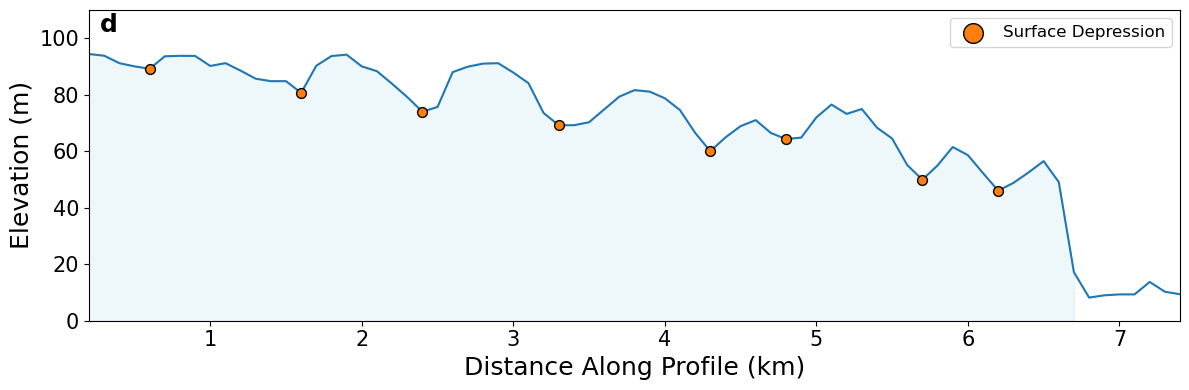

In [6]:

along_flow_elevation_path = '../data/surface_depression_profile/20230609_010221_surface_elevation_mean.pkl'

fig, ax = plt.subplots(figsize=(12,4))

ice_color = '#acd7e5'

# plot elevation along flow
along_flow_df = pd.read_pickle(along_flow_elevation_path)

min_indices = signal.argrelextrema(along_flow_df["elevation"].values, np.less,order=3) 

# make sure to keep ones on the glacier surface
min_indices = min_indices[0]
# min_indices = min_indices[(min_indices !=11)]
min_indices = min_indices[(min_indices !=68)]

min_vals = along_flow_df.loc[min_indices]
min_vals_x = along_flow_df['x'].loc[min_indices]


# pts = gpd.points_from_xy(along_flow_df['x'], along_flow_df['y'])
first_point = along_flow_df['geometry'][0]
distances = []

for geom in along_flow_df['geometry']:
    distance = first_point.distance(geom)
    distances.append(distance/1000) #km

along_flow_df['distances'] = distances
ax.plot(along_flow_df["distances"], along_flow_df["elevation"])

ax.scatter(x=along_flow_df.loc[min_vals.index].distances, y=min_vals.elevation, color='tab:orange', 
           s=50, zorder=10, edgecolor='k', label='Surface Depression')

ax.scatter(x=3.3, y=69.2, color='tab:orange', 
           s=50, zorder=10, edgecolor='k') # add missing one


label_dict = {'fontsize': 18}
labelsize = 15
ax.set_ylabel('Elevation (m)',**label_dict)
ax.set_xlabel('Distance Along Profile (km)', **label_dict)
ax.tick_params(axis='both', which='major', labelsize=labelsize)
ax.set_xlim(min(along_flow_df["distances"]), max(along_flow_df["distances"]))
ax.set_xlim(0.2, max(along_flow_df["distances"]))


ax.set_ylim(0,110)

ax.fill_between(distances[:-7], along_flow_df["elevation"][:-7], 
                 0, alpha=0.2, color = ice_color)


ax.legend(markerscale=2,prop={'size': 12})


text_dict = {'fontsize':18,
             'fontweight': 'bold'}
text_label = ax.text(.01, .99, 'd', ha='left', va='top', transform=ax.transAxes, **text_dict)
    


op = '/media/laserglaciers/upernavik/flexure_manuscipt/figures/'
plt.tight_layout()
# fig.savefig(f'{op}elevation_along_flow_flexures_FINAL.png', dpi=300, transparent=True)
# fig.savefig(f'{op}elevation_along_flow_flexures_FINAL.pdf', dpi=300, transparent=True)
